In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
data = pd.read_excel('iri.xls')

In [136]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [137]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

#we need to manage the null values in the dataset

In [138]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [139]:
data['SL']= data['SL'].fillna(data['SL'].mean())
data['SW']= data['SW'].fillna(data['SW'].mean())
data['PL']= data['PL'].fillna(data['PL'].mean())

In [140]:
data.shape

(150, 5)

In [141]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [142]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

Text(0.5, 1.0, 'Box plot of SW')

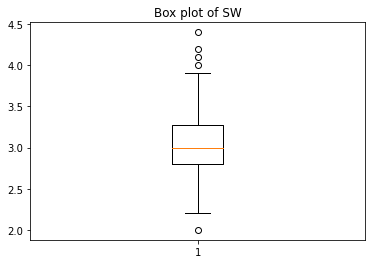

In [143]:
plt.boxplot(data['SW'])
plt.title('Box plot of SW')

some outliers in SW column

In [144]:
Q1 = np.percentile(data['SW'],25,interpolation='midpoint')
Q2 = np.percentile(data['SW'],50,interpolation='midpoint')
Q3 = np.percentile(data['SW'],75,interpolation='midpoint')

In [145]:
IQR=Q3-Q1
low_lim = Q1-1.5*IQR
upper_lim =Q3+1.5*IQR

In [146]:
Outlier = []
for i in data['SW']:
        if((i<low_lim) or(i>upper_lim)):
            Outlier.append(i)

In [147]:
ind = data['SW']<low_lim
data.loc[ind].index

Int64Index([60], dtype='int64')

In [148]:
ind = data['SW']>upper_lim
data.loc[ind].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [149]:
data.drop([60,14, 15, 32, 33],inplace=True)

Text(0.5, 1.0, 'Box plot of SW')

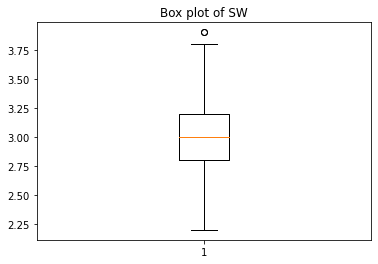

In [150]:
plt.boxplot(data['SW'])
plt.title('Box plot of SW')

In [151]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


In [152]:
data['Classification'].nunique()

3

In [153]:
from sklearn.preprocessing import LabelEncoder
Label_enc=LabelEncoder()
data['SL'] = Label_enc.fit_transform(data['SL'])


In [154]:
data.head()

,SL,SW,PL,PW,Classification
0,8,3.5,1.4,0.2,Iris-setosa
1,6,3.0,1.4,0.2,Iris-setosa
2,16,3.2,1.3,0.2,Iris-setosa
3,3,3.1,1.5,0.2,Iris-setosa
4,7,3.6,1.4,0.2,Iris-setosa


In [155]:
X = data.drop(['Classification'], axis=1)
y = data['Classification']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [156]:
from sklearn.svm import SVC

In [157]:
svm_gauss=SVC(kernel='rbf')
svm_gauss.fit(X_train,y_train)
y_pred=svm_gauss.predict(X_test)

In [158]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Conclusion matrix\n',confusion_matrix(y_test,y_pred))

Accuracy Score: 0.7931034482758621
Conclusion matrix
 [[8 1 0]
 [0 8 1]
 [0 4 7]]


In [159]:
from sklearn.ensemble import RandomForestClassifier
rf_mod = RandomForestClassifier(random_state=42)
rf_mod.fit(X_train,y_train)
y_pred=rf_mod.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Conclusion matrix\n',confusion_matrix(y_test,y_pred))

Accuracy Score: 0.9310344827586207
Conclusion matrix
 [[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]


perform standard scaling

In [160]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

doing again randomforest

In [161]:
from sklearn.ensemble import RandomForestClassifier
rf_mod = RandomForestClassifier(random_state=42)
rf_mod.fit(X_train,y_train)
y_pred=rf_mod.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Conclusion matrix\n',confusion_matrix(y_test,y_pred))

Accuracy Score: 0.896551724137931
Conclusion matrix
 [[9 0 0]
 [0 9 0]
 [0 3 8]]


In [162]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [163]:
y_pred = gb.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 0.9310344827586207


GrandientBoosting and RandomForest gives better accuracy 